In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from pylab import *
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz, plot_tree
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [63]:
#!{sys.executable} -m pip install graphviz
#!{sys.executable} -m pip install pydotplus

     |████████████████████████████████| 286kB 1.3MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp37-none-any.whl size=24567 sha256=99526c41ceb752aa4688c99b5a13593f4d33081e23ff416a731f5734bf6ed95a
  Stored in directory: /Users/linhanhnguyen/Library/Caches/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


# Data Analysis for 2016-us-election data

In [3]:
df = pd.read_csv('2016-us-election/primary_results.csv')
df

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
...,...,...,...,...,...,...,...,...
24606,Wyoming,WY,Teton-Sublette,95600028.0,Republican,Ted Cruz,0,0.000
24607,Wyoming,WY,Uinta-Lincoln,95600027.0,Republican,Donald Trump,0,0.000
24608,Wyoming,WY,Uinta-Lincoln,95600027.0,Republican,John Kasich,0,0.000
24609,Wyoming,WY,Uinta-Lincoln,95600027.0,Republican,Marco Rubio,0,0.000


In [3]:
df2 = pd.read_csv('2016-us-election/county_facts.csv')

In [4]:
df3 = pd.read_csv('2016-us-election/county_facts_dictionary.csv')

In [9]:
pd.isnull(df).head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [97]:
df.shape

(24611, 8)

  * There are 8 features (should be seven because 8 - 1)
  
  * there are 24,611 records

### Why are the numbers different in each state?

In [28]:
df.groupby('state')

### There are more Republican votes? 

-Look into this

In [19]:
df.groupby('party').size()

party
Democrat       8959
Republican    15652
dtype: int64

### Candidate Analysis

In [42]:
hillary_votes = df['candidate']=='Hillary Clinton'
df[hillary_votes].head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
5,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906
7,Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755
9,Alabama,AL,Blount,1009.0,Democrat,Hillary Clinton,564,0.551


In [65]:
df.loc[df['candidate'] == 'Hillary Clinton', 'votes'].sum()

15692452

In [92]:
#To get list of candidates with no duplicates
candidate_list = list(set(df['candidate']))


In [13]:
total_candidate_votes = df.groupby('candidate')['votes'].sum()
total_candidate_votes

candidate
 No Preference         8152
 Uncommitted             43
Ben Carson           564553
Bernie Sanders     11959102
Carly Fiorina         15191
Chris Christie        24353
Donald Trump       13302541
Hillary Clinton    15692452
Jeb Bush              94411
John Kasich         4159949
Marco Rubio         3321076
Martin O'Malley         752
Mike Huckabee          3345
Rand Paul              8479
Rick Santorum          1782
Ted Cruz            7603006
Name: votes, dtype: int64

  * From the total_candidate_votes, we see that Hillary Clinton has more votes than Donald Trump, at least by 2,389,911 votes

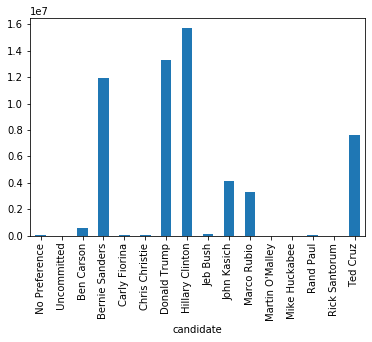

In [14]:
total_candidate_votes.plot(kind='bar')

In [7]:
df.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [70]:
zero_data = df[df.eq(0).any(1)]
pd.set_option('display.max_rows', 600)
#print(zero_data.to_string())

In [5]:
df_fin = df[df['votes'] != 0]
df_fin

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
...,...,...,...,...,...,...,...,...
24601,Wyoming,WY,Sweetwater-Carbon,95600026.0,Republican,Marco Rubio,28,0.315
24602,Wyoming,WY,Sweetwater-Carbon,95600026.0,Republican,Ted Cruz,45,0.506
24603,Wyoming,WY,Teton-Sublette,95600028.0,Republican,Donald Trump,21,0.525
24605,Wyoming,WY,Teton-Sublette,95600028.0,Republican,Marco Rubio,19,0.475


In [6]:
le = preprocessing.LabelEncoder()

le.fit(list(set(df_fin['state_abbreviation'])))
state_abr = le.transform(df_fin['state_abbreviation'])

le.fit(list(set(df_fin['county'])))
county_out = le.transform(df_fin['county'])


In [8]:
data = {'state_abbreviation': list(state_abr),
        'county': list(county_out),
        'party':[1 if i=='Democrat' else 0 for i in df_fin['party']],
        'votes': [i for i in df_fin['votes']], 
        'fraction_votes': [i for i in df_fin['fraction_votes']], 
        'flips': [i for i in df_fin['votes']], 
        'candidate': [i for i in df_fin['candidate']]}
header = ['state_abbreviation', 'county', 'party', 'votes', 'fraction_votes', 'flips', 'candidate']

dataset = pd.DataFrame(data, columns = header)
dataset

,state_abbreviation,county,party,votes,fraction_votes,flips,candidate
0,1,102,1,544,0.182,544,Bernie Sanders
1,1,102,1,2387,0.800,2387,Hillary Clinton
2,1,113,1,2694,0.329,2694,Bernie Sanders
3,1,113,1,5290,0.647,5290,Hillary Clinton
4,1,125,1,222,0.078,222,Bernie Sanders
...,...,...,...,...,...,...,...
24003,48,2225,0,28,0.315,28,Marco Rubio
24004,48,2225,0,45,0.506,45,Ted Cruz
24005,48,2253,0,21,0.525,21,Donald Trump
24006,48,2253,0,19,0.475,19,Marco Rubio


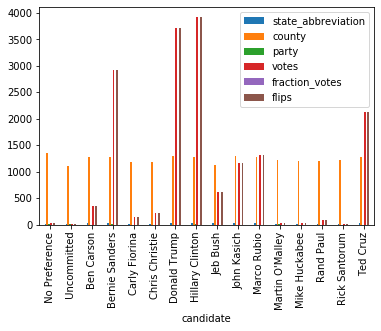

In [74]:
dataset.groupby(by='candidate').mean().plot(kind='bar')

In [9]:
my_val = dataset.values
X = my_val[:, 0:6]
Y = my_val[:, 6]
validation_size = 0.25
seed = 4
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [12]:
X_train.shape

(18006, 6)

In [14]:
Y_train

array(['Bernie Sanders', 'Donald Trump', 'Bernie Sanders', ...,
       'Hillary Clinton', 'Bernie Sanders', 'Ted Cruz'], dtype=object)

In [106]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
predictions2 = dtc.predict(X_validation)
print(classification_report(Y_validation, predictions2))
print(accuracy_score(Y_validation, predictions2))

                 precision    recall  f1-score   support

  No Preference       0.99      1.00      0.99        77
    Uncommitted       0.00      0.00      0.00         2
     Ben Carson       0.72      0.77      0.75       394
 Bernie Sanders       0.77      0.75      0.76      1060
  Carly Fiorina       0.26      0.25      0.25        32
 Chris Christie       0.21      0.21      0.21        28
   Donald Trump       0.76      0.75      0.76       872
Hillary Clinton       0.75      0.77      0.76       996
       Jeb Bush       0.19      0.21      0.20        29
    John Kasich       0.62      0.66      0.64       881
    Marco Rubio       0.65      0.59      0.62       638
Martin O'Malley       0.57      0.57      0.57         7
  Mike Huckabee       0.08      0.09      0.08        23
      Rand Paul       0.12      0.12      0.12        25
  Rick Santorum       0.14      0.14      0.14        22
       Ted Cruz       0.65      0.64      0.64       916

       accuracy              

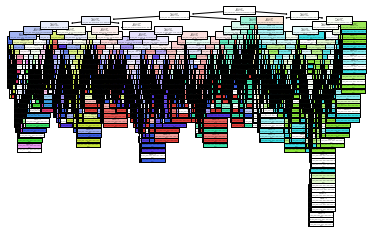

In [39]:
plt.figure()
dtc = tree.DecisionTreeClassifier().fit(X_train, Y_train)
plot_tree(dtc, filled=True)
plt.show()


In [90]:
pd.DataFrame(
    confusion_matrix(Y_validation, predictions2),
    #columns=['Predicted Not Survival', 'Predicted Survival'],
    #index=['True Not Survival', 'True Survival']
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
2,0,0,302,0,1,0,0,0,3,47,22,0,2,2,1,14
3,0,0,0,802,0,0,0,257,0,0,0,1,0,0,0,0
4,0,0,0,0,6,7,0,0,5,3,0,0,2,3,6,0
5,0,0,0,0,4,7,0,0,5,6,0,0,3,1,2,0
6,0,0,3,0,0,0,652,0,0,51,30,0,0,0,0,136
7,1,0,0,232,0,0,0,763,0,0,0,0,0,0,0,0
8,0,0,4,0,0,0,0,0,9,2,0,0,6,5,2,1
9,0,0,45,0,3,5,66,0,7,579,70,0,4,3,6,93


In [102]:
tree.export_graphviz(dtc, out_file='tree.dot', feature_names=dataset.columns[1:8])

In [103]:
from subprocess import call

call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])

0